<div class="markdown-google-sans">
<h1><strong>Retail Analysis | One</strong></h1>
</div>

A base de dados Varejo é um recorte de 50.000 compras de 1.000 clientes realizadas em uma rede de supermercados no período de 2010 à 2022.

> 1. **DATA:** Data da compra
2. **CO_ID:** Identificação do número de compra (número da nota fiscal)
3. **CL_ID:** Identificação do cliente (número do cliente)
4. **CL_GENERO:** Sexo biológico informado pelo cliente
5. **CL_EC:** Estado civil do cliente
6. **CL_FHL:** Número de filhos do cliente
7. **CL_SEG:** Segmentação econômica do cliente (classe A, B ou C)
8. **PR_ID:** Código do produto (SKU) adquirido
9. **PR_CAT:** Categoria do produto adquirido
10. **PR_NOME:** Nome do produto adquirido

<div class="markdown-google-sans">

### **12 Anos de Coleta, $x$ Mil compras de $y$ Mil clientes** | [Pão de Açucar](https://www.paodeacucar.com/)
</div>


<div class="markdown-google-sans">

---
</div>

<div class="markdown-google-sans">

### Bibliotecas & Limpeza
</div>

In [ ]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [ ]:
# Importação dos dados
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/BaseVarejo.csv', sep=';', encoding='latin-1')

# Removendo colunas inúteis
df.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], inplace=True)

# Tranformando a coluna DATA em formato datetime
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y')

# Transformando os IDs em Unidades Únicas `Strings` 
df[['CO_ID', 'CL_ID', 'PR_ID']] = df[['CO_ID', 'CL_ID', 'PR_ID']].astype('str')
pd.DataFrame({'column': df.columns, 'dtype': df.dtypes.values, 'null_count': df.isnull().sum().values})

# Renomeando as colunas 
df = df.rename(columns={"DATA": "DATA", 
                        "CO_ID": "NOTA_FISCAL", 
                        "CL_ID": "CLIENTE_ID", 
                        "CL_GENERO": "CLIENTE_SEX", 
                        "CL_EC": "CLIENTE_EST_CIVIL",
                        "CL_FHL": "CLIENTE_NUM_FILHOS", 
                        "CL_SEG": "CLIENTE_CLASSE", 
                        "PR_ID": "PRODUTO_ID", 
                        "PR_CAT": "PRODUTO_CATEGORIA", 
                        "PR_NOME": "PRODUTO_NOME"})

<div class="markdown-google-sans">

### Produtos e IDs

</div>

> Correção de uma ID que se repetia 2 vezes ao mesmo produto

In [ ]:
# Análise de IDs se repetindo
dfgroup = df.loc[:, ['PRODUTO_ID', 'PRODUTO_NOME']].groupby(['PRODUTO_NOME']).nunique().reset_index()

print(f"IDs Iguais para mesmos produtos: {dfgroup['PRODUTO_ID'].nunique() == dfgroup['PRODUTO_NOME'].nunique()}")

# Visualização dos produtos
display(dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, :])

# Exportação para o relatório
dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, :].to_csv('double_id.csv', index=False)

IDs Iguais para mesmos produtos: False


,PR_NOME,PR_ID
9,ALMONDEGA,2
10,AMACIANTE,2
11,ARROZ,2
12,ARROZ INTEGRAL,2
13,ATUM,2
...,...,...
113,TIRA LIMO,2
114,TIRA MANCHA,2
115,TOMATE,2
116,UVA,2


In [ ]:
for nome in tqdm(dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, 'PRODUTO_NOME']):
  df.loc[df['PRODUTO_NOME'] == nome, ['PRODUTO_ID']] = df.loc[df['PRODUTO_NOME'] == nome, 'PRODUTO_ID'].unique()[0]

100%|██████████| 109/109 [00:15<00:00,  7.23it/s]


In [ ]:
dfgroup = df.loc[:, ['PRODUTO_ID', 'PRODUTO_NOME']].groupby(['PRODUTO_NOME']).nunique().reset_index()

print(f"IDs Iguais para mesmos produtos: {dfgroup['PRODUTO_ID'].nunique() == dfgroup['PRODUTO_NOME'].nunique()}")
dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, :]

IDs Iguais para mesmos produtos: False


,PR_NOME,PR_ID
9,ALMONDEGA,2
10,AMACIANTE,2
11,ARROZ,2
12,ARROZ INTEGRAL,2
13,ATUM,2
...,...,...
113,TIRA LIMO,2
114,TIRA MANCHA,2
115,TOMATE,2
116,UVA,2


In [ ]:
dfgroup = df.loc[:, ['PRODUTO_ID', 'PRODUTO_NOME']].groupby(['PRODUTO_ID']).nunique().reset_index()

print(f"Compartilhamento de IDs: {dfgroup['PRODUTO_NOME'].nunique() == dfgroup['PRODUTO_NOME'].nunique()}")

dfgroup.loc[dfgroup['PRODUTO_NOME'] != 1, :]

Compartilhamento de IDs: True


,PR_ID,PR_NOME


#### Algo

In [ ]:
df

,DATA,CO_ID,CL_ID,CL_GENERO,CL_EC,CL_FHL,CL_SEG,PR_ID,PR_CAT,PR_NOME
0,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800210,ALIMENTOS,BANANA
1,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800216,ALIMENTOS,CAFE
2,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800247,ALIMENTOS,PAO DE FORMA
3,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800225,ALIMENTOS,DOCE
4,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800248,ALIMENTOS,PAPINHA INFANTIL
...,...,...,...,...,...,...,...,...,...,...
49994,2022-08-31,875560,1000,M,SOLTEIRO,1,B,400602,PET,RACAO SECA PARA GATOS
49995,2022-09-01,875747,1000,M,SOLTEIRO,1,B,800235,ALIMENTOS,LEITE CONDENSADO
49996,2022-09-01,875747,1000,M,SOLTEIRO,1,B,800204,ALIMENTOS,ALMONDEGA
49997,2022-09-01,875747,1000,M,SOLTEIRO,1,B,500503,LIMPEZA,BALDE


## Início da Análise
> Correlação entre Váriaveis

<Axes: >

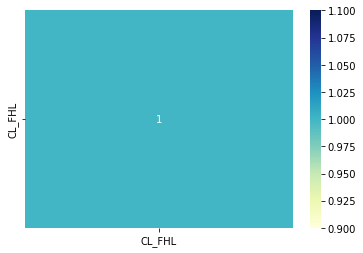

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

#### Sem Identificação de Volta
> Não será possivel análisar se o mesmo cliente voltou ao mercado
- **Além de que temos uma única compra por dia**

### Resolução

In [ ]:
# Identificando se o CL_ID se repete para identificar a volta do cliente no supermercado
print(f"Totais de Clientes por Dia: {df[['DATA', 'CO_ID', 'CL_ID']].groupby(['DATA', 'CO_ID']).agg(['nunique']).reset_index().iloc[:, 2].unique()}")
display(df[['DATA', 'CO_ID', 'CL_ID']].groupby(['DATA', 'CO_ID']).agg(['nunique']))

Totais de Clientes por Dia: [1]


,,CL_ID
,,nunique
DATA,CO_ID,
2010-01-02,10872,1
2010-01-03,11059,1
2010-01-04,11246,1
2010-01-05,11433,1
2010-01-06,11620,1
...,...,...
2022-08-28,874999,1
2022-08-29,875186,1


In [ ]:
# Identificando se o CL_ID se repete para identificar a volta do cliente no supermercado
print(f"Totais de Notas Ficais por Dia: {df[['DATA', 'CO_ID', 'CL_ID']].groupby(['DATA', 'CL_ID']).agg(['nunique']).reset_index().iloc[:, 2].unique()}")
display(df[['DATA', 'CO_ID', 'CL_ID']].groupby(['DATA', 'CL_ID']).agg(['nunique']))

Totais de Notas Ficais por Dia: [1]


,,CO_ID
,,nunique
DATA,CL_ID,
2010-01-02,1,1
2010-01-03,1,1
2010-01-04,1,1
2010-01-05,2,1
2010-01-06,2,1
...,...,...
2022-08-28,1000,1
2022-08-29,1000,1


In [ ]:
df.head(3)

,DATA,CO_ID,CL_ID,CL_GENERO,CL_EC,CL_FHL,CL_SEG,PR_ID,PR_CAT,PR_NOME
0,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800210,ALIMENTOS,BANANA
1,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800216,ALIMENTOS,CAFE
2,2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,0,C,800247,ALIMENTOS,PAO DE FORMA


In [ ]:
print(f"CL_FHL: {df.groupby(['DATA', 'CO_ID', 'CL_ID', 'CL_GENERO', 'CL_EC']).nunique().head(50).reset_index().iloc[:, 5].unique()}")
df.groupby(['DATA', 'CO_ID', 'CL_ID', 'CL_GENERO', 'CL_EC']).nunique().head(50)

CL_FHL: [1]


,,,,,CL_FHL,CL_SEG,PR_ID,PR_CAT,PR_NOME
DATA,CO_ID,CL_ID,CL_GENERO,CL_EC,,,,,
2010-01-02,10872,1,M,CASADO OU UNIAO ESTAVEL,1,1,15,4,15
2010-01-03,11059,1,M,CASADO OU UNIAO ESTAVEL,1,1,13,3,13
2010-01-04,11246,1,M,CASADO OU UNIAO ESTAVEL,1,1,6,3,6
2010-01-05,11433,2,M,SEPARADO,1,1,8,4,8
2010-01-06,11620,2,M,SEPARADO,1,1,13,4,13
2010-01-07,11807,2,M,SEPARADO,1,1,11,5,11
2010-01-08,11994,2,M,SEPARADO,1,1,11,3,11
2010-01-09,12181,2,M,SEPARADO,1,1,5,3,5
2010-01-10,12368,3,F,SOLTEIRO,1,1,14,4,14


In [ ]:
df['CL_ID'].unique().max()

1000